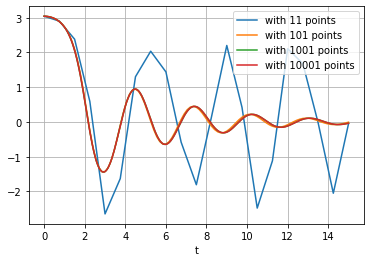

/usr/local/lib/python3.7/dist-packages/scipy/integrate/_ivp/common.py:41: UserWarning: The following arguments have no effect for a chosen solver: `u_eval`.
  .format(", ".join("`{}`".format(x) for x in extraneous)))


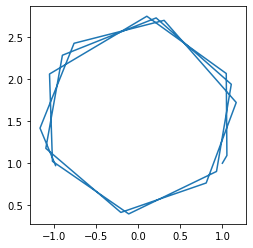

In [15]:
# Runge Kutta example
import numpy as np
import matplotlib.pyplot as plt

def pend(y, t, a, b):
  return np.array([y[1], -a*y[1] - b*np.sin(y[0])])

a = 0.5
b = 5.0
y0 = np.array([np.pi - 0.1, 0.0])

def rungekutta(f, y0, t, args=()):
  n = len(t)
  y = np.zeros((n, len(y0)))
  y[0] = y0
  for i in range(n-1):
    h = t[i + 1] - t[i]
    y[i + 1] = y[i] + h * f(y[i] + f(y[i], t[i], *args) * h / 2., 
                            t [i] + h / 2., *args)
  return y

t4 = np.linspace(0, 15, 21)
sol4 = rungekutta(pend, y0, t4, args=(a, b))
t = np.linspace(0, 15, 101)
sol = rungekutta(pend, y0, t, args=(a, b))
t2 = np.linspace(0, 15, 1001)
sol2 = rungekutta(pend, y0, t2, args=(a, b))
t3 = np.linspace(0, 15, 10001)
sol3 = rungekutta(pend, y0, t3, args=(a, b))

plt.plot(t4, sol4[:,0], label='with 11 points')
plt.plot(t, sol[:,0], label='with 101 points')
plt.plot(t2, sol2[:,0], label='with 1001 points')
plt.plot(t3, sol3[:,0], label='with 10001 points')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()
print('')

# solve_ivp example
from scipy import integrate

def f(u,s):
  x, y = s
  fx = np.cos(y)
  fy = np.sin(x)
  return fx, fy

sol = integrate.solve_ivp(f, (0,20), (1,1), u_eval=np.linspace(0,20,100))
x, y = sol.y
plt.plot(x, y)
plt.axis("scaled")
plt.show()

